# 29회 ADP 복원 

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://www.data.go.kr/data/15094266/fileData.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv
- 데이터 설명 : 대구도시공사_빅데이터_영구임대아파트 입주자 퇴거여부 데이터, 고유번호를 가진 계약자와 특정 아파트에 대해 매년 퇴거여부를 기록한 데이터

### 1-1  계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.

In [1]:
class font_setting():
    def __init__(self):
        self.font_url = "https://github.com/google/fonts/blob/main/ofl/nanumgothic/NanumGothic-Regular.ttf?raw=true"
        self.path = "./NanumGothic-Regular.ttf"
        
    def get_font(self):
        import requests
        from matplotlib import font_manager, rc
        import matplotlib.pyplot as plt
        
        res = requests.get(self.font_url)
        
        with open(self.path, "wb") as font_file:
            font_file.write(res.content)
        
        new_font = font_manager.FontEntry(
            fname=self.path, 
            name=font_manager.FontProperties(fname=self.path).get_name()
        )
        font_manager.fontManager.ttflist.append(new_font)
        plt.rcParams['font.family'] = new_font.name
    
    def delete_font(self):
        import os
        os.remove(self.path)

font_set = font_setting()
font_set.get_font()

In [2]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url1 = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv'
encoded_url1 = urllib.parse.quote(url1, safe=':/')

response = urllib.request.urlopen(encoded_url1, context=context)
df1 = pd.read_csv(response, encoding='euc-kr')
df1

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
0,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2008,47100,3646000,46,33,남,미혼,3,미퇴거
1,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2009,56500,4375000,46,34,남,미혼,3,미퇴거
2,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2010,56500,4375000,46,35,남,미혼,3,미퇴거
3,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2011,69900,5408000,46,36,남,미혼,3,미퇴거
4,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2012,69900,5408000,46,37,남,미혼,3,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86899,12882,해지,8,180,지산5단지아파트,3,8.0,86891,14,15,...,2018.0,2017,49500,3055000,60,56,남,기혼,2,미퇴거
86900,12882,해지,8,180,지산5단지아파트,3,8.0,86891,14,15,...,2018.0,2018,49500,3055000,60,57,남,기혼,2,퇴거
86901,12883,유효,2,36,지산5단지아파트,3,8.0,86891,14,15,...,NaN,2018,45000,2365000,52,49,남,미혼,1,미퇴거
86902,12883,유효,2,36,지산5단지아파트,3,8.0,86891,14,15,...,NaN,2019,45000,2365000,52,50,남,미혼,1,미퇴거


In [3]:
grouped = df1.groupby('계약서고유번호').max('거주연도')
grouped

,순번,재계약횟수,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,입주연도,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수
계약서고유번호,,,,,,,,,,,,,,,,,
1,12673,4,88,3,8.0,85369,6,12,1,2005,2012.0,2012,77300,5302000,44,35,2
6,12683,7,174,3,8.0,85421,6,15,6,2001,2016.0,2016,48600,2144000,32,27,1
14,12702,10,237,3,8.0,85576,7,15,14,2001,NaN,2020,81600,5598000,67,66,1
27,12789,10,227,3,8.0,86179,10,19,27,2002,NaN,2020,66600,3116000,61,60,3
40,12796,10,222,3,8.0,86224,10,15,40,2003,NaN,2020,129240,8865600,58,57,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86900,3772,1,7,1,5.0,25253,12,12,86863,2020,NaN,2020,42400,2062000,57,56,1
86901,4050,1,7,1,5.0,27065,4,12,86864,2020,NaN,2020,54200,3930000,82,81,1
86902,3693,1,7,1,5.0,24713,10,12,86865,2020,NaN,2020,56000,3930000,67,66,1


### 1-2 결측치를 처리하라

결측치가 존재하는 데이터는 아파트 평점과 퇴거연도이다. 정성적으로 봤을 때,
- 평점은 어떤 오류나 평점을 주지 않은 것으로 판단하고 0으로 대체한다.
- 퇴거연도는 아직 퇴거하지 않은 상태를 의미할 것이므로 혼란을 막기 위해 임의의 값이 -1로 대체한다.

In [4]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10472 entries, 1 to 86904
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순번       10472 non-null  int64  
 1   재계약횟수    10472 non-null  int64  
 2   거주개월     10472 non-null  int64  
 3   아파트 ID   10472 non-null  int64  
 4   아파트 평점   10458 non-null  float64
 5   호실고유번호   10472 non-null  int64  
 6   층        10472 non-null  int64  
 7   평형대      10472 non-null  int64  
 8   계약자고유번호  10472 non-null  int64  
 9   입주연도     10472 non-null  int64  
 10  퇴거연도     4214 non-null   float64
 11  거주연도     10472 non-null  int64  
 12  월세(원)    10472 non-null  int64  
 13  보증금(원)   10472 non-null  int64  
 14  대표나이     10472 non-null  int64  
 15  나이       10472 non-null  int64  
 16  거주자 수    10472 non-null  int64  
dtypes: float64(2), int64(15)
memory usage: 1.4 MB


In [5]:
grouped['아파트 평점'] = grouped['아파트 평점'].fillna(0)
grouped['퇴거연도'] = grouped['퇴거연도'].fillna(-1)
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10472 entries, 1 to 86904
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순번       10472 non-null  int64  
 1   재계약횟수    10472 non-null  int64  
 2   거주개월     10472 non-null  int64  
 3   아파트 ID   10472 non-null  int64  
 4   아파트 평점   10472 non-null  float64
 5   호실고유번호   10472 non-null  int64  
 6   층        10472 non-null  int64  
 7   평형대      10472 non-null  int64  
 8   계약자고유번호  10472 non-null  int64  
 9   입주연도     10472 non-null  int64  
 10  퇴거연도     10472 non-null  float64
 11  거주연도     10472 non-null  int64  
 12  월세(원)    10472 non-null  int64  
 13  보증금(원)   10472 non-null  int64  
 14  대표나이     10472 non-null  int64  
 15  나이       10472 non-null  int64  
 16  거주자 수    10472 non-null  int64  
dtypes: float64(2), int64(15)
memory usage: 1.4 MB


### 1-3 이상치를 처리하라

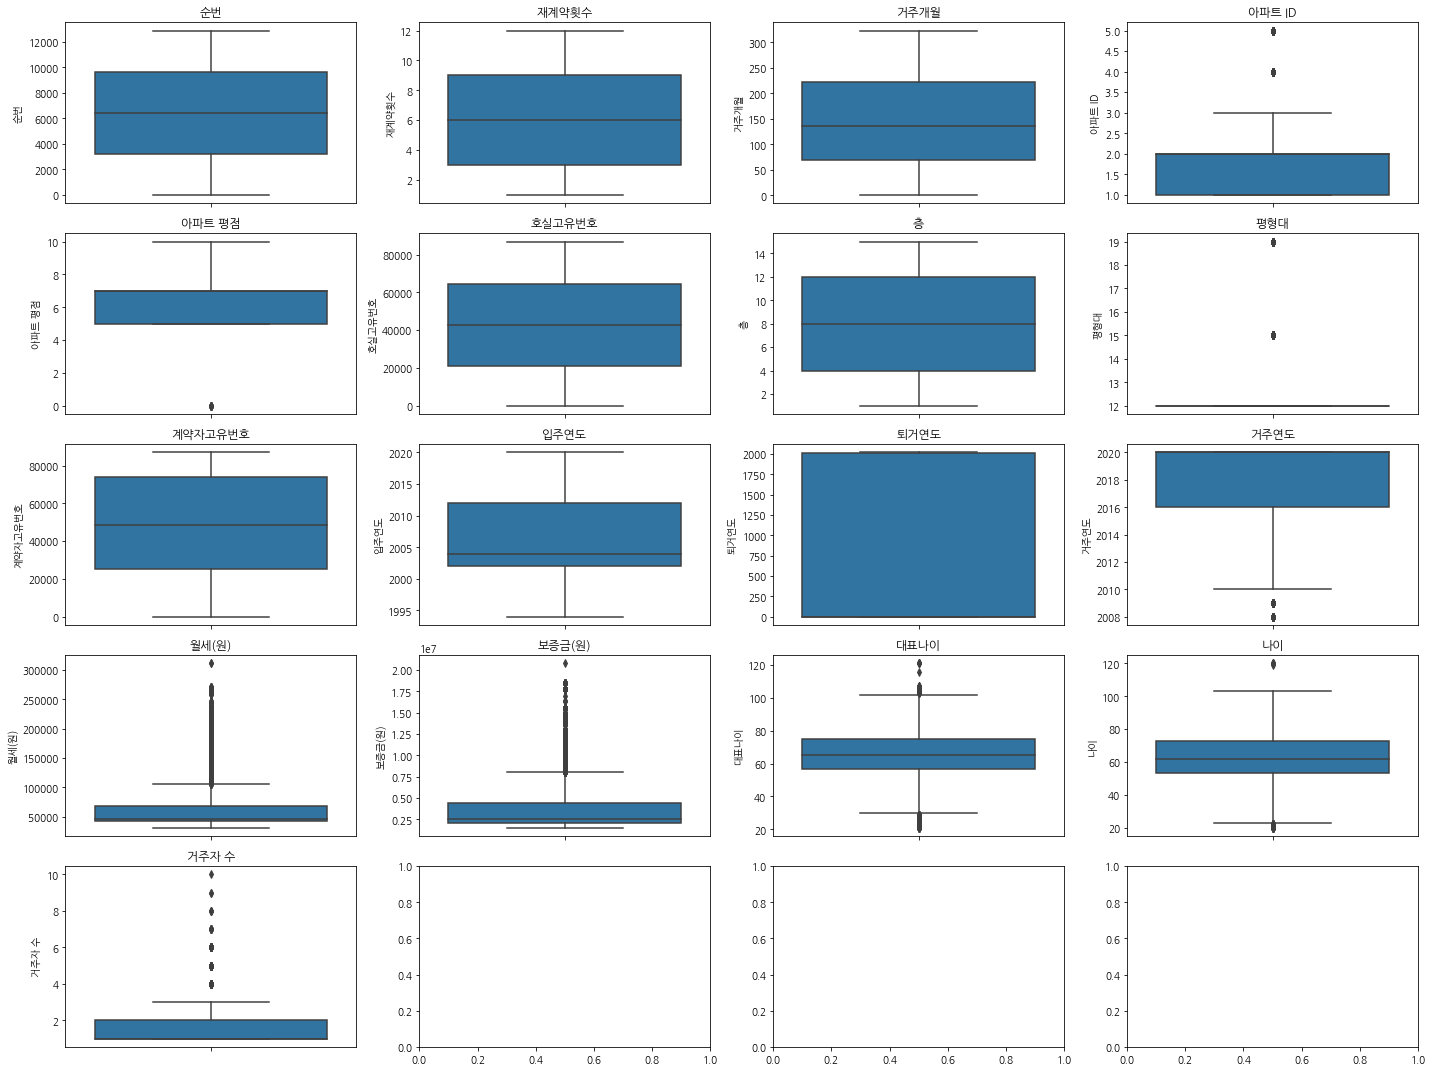

In [6]:
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt

features = grouped.columns.tolist()
# features.remove(target)


r,c = ceil(len(features)/4), 4
fig, axes = plt.subplots(r, c, figsize=(20, 15))
for i, column in enumerate(features):
    ax_r, ax_c = int(i//c), int(i%c)
    sns.boxplot(y=grouped[column], ax = axes[ax_r][ax_c])
    axes[ax_r][ax_c].set_title(column)

plt.tight_layout()
plt.show()

In [7]:
## IQR 기준

# 수치형 변수들만
f = ['재계약횟수', '아파트 평점', '층', '평형대', '입주연도', '퇴거연도', '거주연도', '월세(원)', '보증금(원)', '나이', '대표나이',  '거주자 수']

Q1 = grouped[f].quantile(0.25)
Q3 = grouped[f].quantile(0.75)
IQR = Q3 - Q1

grouped_within_iqr = grouped[((grouped[f] >= (Q1 - 1.5 * IQR)) & (grouped[f] <= (Q3 + 1.5 * IQR))).all(axis=1)]
grouped_within_iqr

,순번,재계약횟수,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,입주연도,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수
계약서고유번호,,,,,,,,,,,,,,,,,
1,12673,4,88,3,8.0,85369,6,12,1,2005,2012.0,2012,77300,5302000,44,35,2
111,11868,10,222,3,8.0,79523,3,12,111,2003,-1.0,2020,41300,1959000,90,89,1
136,11997,9,222,3,8.0,80392,7,12,136,2003,-1.0,2020,42300,1959000,65,64,1
162,12019,10,236,3,8.0,80539,8,12,162,2001,-1.0,2020,56300,3866000,58,57,1
175,12027,10,222,3,8.0,80604,8,12,175,2003,-1.0,2020,82500,5659500,71,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86898,4291,1,7,1,5.0,28730,10,12,86861,2020,-1.0,2020,42400,2062000,60,59,1
86899,975,1,7,1,5.0,3431,15,12,86862,2020,-1.0,2020,37500,2062000,41,40,1
86900,3772,1,7,1,5.0,25253,12,12,86863,2020,-1.0,2020,42400,2062000,57,56,1


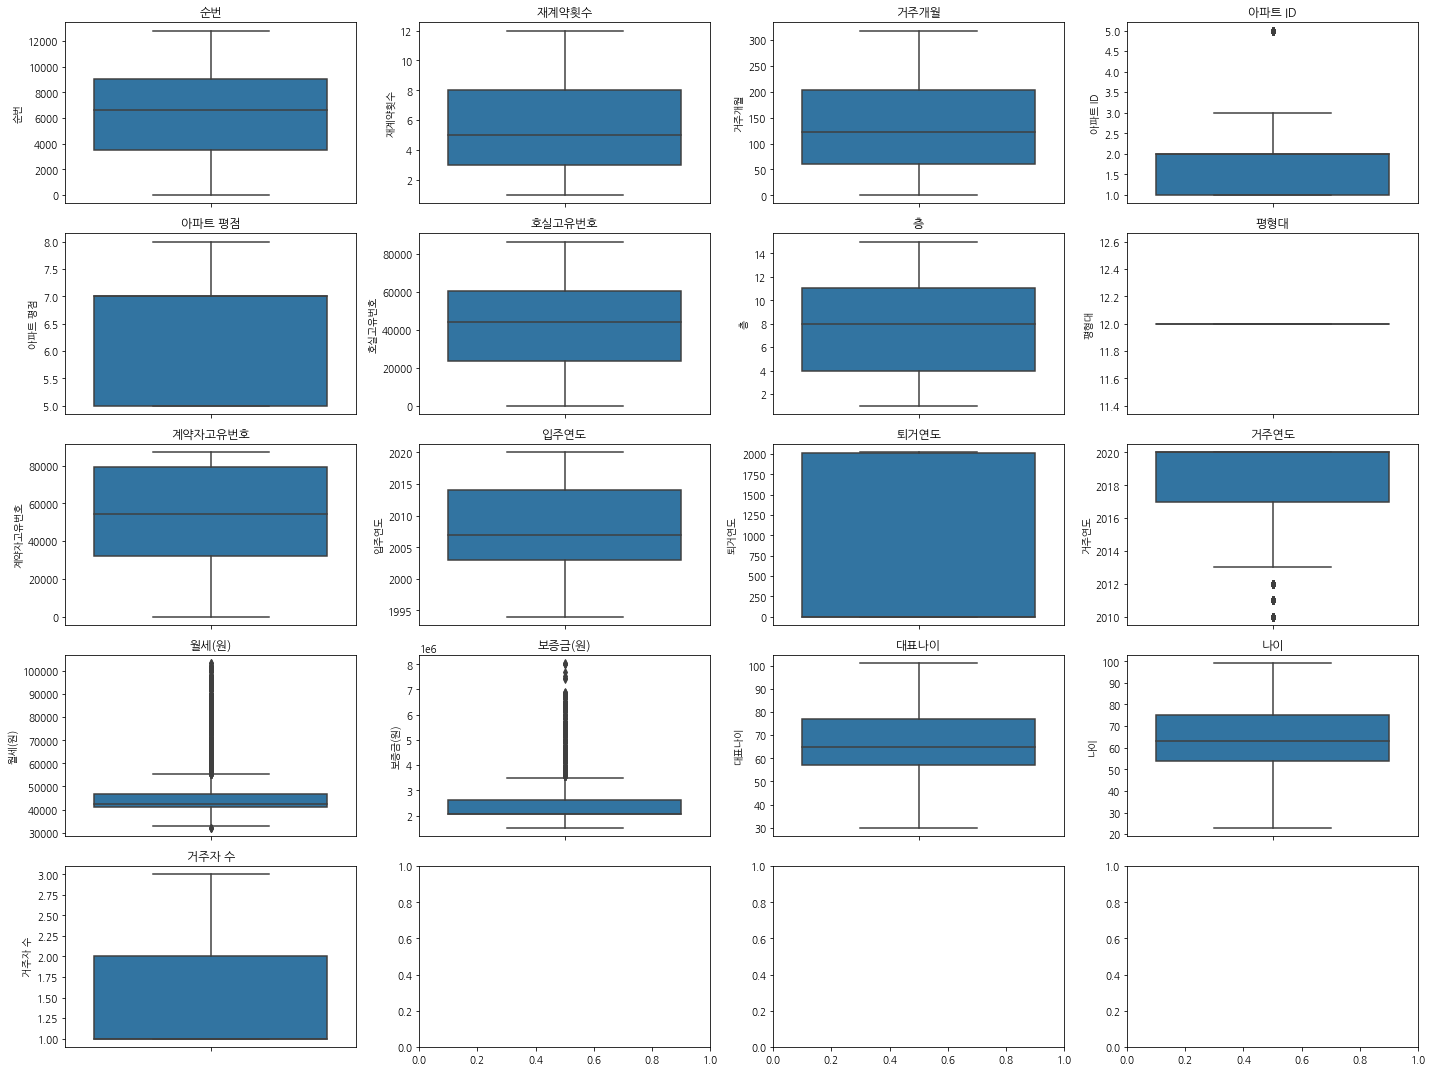

In [8]:
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt

features = grouped_within_iqr.columns.tolist()
# features.remove(target)


r,c = ceil(len(features)/4), 4
fig, axes = plt.subplots(r, c, figsize=(20, 15))
for i, column in enumerate(features):
    ax_r, ax_c = int(i//c), int(i%c)
    sns.boxplot(y=grouped_within_iqr[column], ax = axes[ax_r][ax_c])
    axes[ax_r][ax_c].set_title(column)

plt.tight_layout()
plt.show()

### 2-1 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 '높음', 작으면 '낮음' 으로 재계약 횟수 이분 변수를 구성하시오.

In [9]:
grouped_within_iqr['label'] = grouped_within_iqr['재계약횟수'].apply(lambda x: '높음' if x > grouped_within_iqr['재계약횟수'].median() else '낮음') 
grouped_within_iqr = grouped_within_iqr.drop('재계약횟수',axis=1)
grouped_within_iqr

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,순번,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,입주연도,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수,label
계약서고유번호,,,,,,,,,,,,,,,,,
1,12673,88,3,8.0,85369,6,12,1,2005,2012.0,2012,77300,5302000,44,35,2,낮음
111,11868,222,3,8.0,79523,3,12,111,2003,-1.0,2020,41300,1959000,90,89,1,높음
136,11997,222,3,8.0,80392,7,12,136,2003,-1.0,2020,42300,1959000,65,64,1,높음
162,12019,236,3,8.0,80539,8,12,162,2001,-1.0,2020,56300,3866000,58,57,1,높음
175,12027,222,3,8.0,80604,8,12,175,2003,-1.0,2020,82500,5659500,71,70,1,높음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86898,4291,7,1,5.0,28730,10,12,86861,2020,-1.0,2020,42400,2062000,60,59,1,낮음
86899,975,7,1,5.0,3431,15,12,86862,2020,-1.0,2020,37500,2062000,41,40,1,낮음
86900,3772,7,1,5.0,25253,12,12,86863,2020,-1.0,2020,42400,2062000,57,56,1,낮음


### 2-2 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

차원축소는 차원의 저주 현상으로 인해 차원이 증가하면 증가할수록 지수적으로 데이터간의 거리가 멀어져 각 데이터가 설명할 수 있는 부분의 영역이 기하급수적으로 줄어드는 것을 방지하기 위함이다. 즉, 데이터가 설명할 수 있는 영역을 더 넓히는 작업을 의미하기 때문에 불필요한 변수가 많다면 설명력을 높이기 위해 차원 축소가 필요하다. 그러나 반대로 현재 설명변수들이 설명할 수 있는 부분의 영역이 많다면 굳이 차원 축소를 할 필요가 없을 것이다. 하지만, 대부분 이러한 경우는 데이터가 매우 많은 경우에 가능하므로 데이터가 적다면 차원축소를 고려할 필요가 있다.

In [10]:
features = grouped_within_iqr.columns.to_list()
features.remove('label')

# 계약자 고유 번호는 cheating의 위험이 있으므로 삭제
features.remove('계약자고유번호')

from sklearn.preprocessing import StandardScaler

grouped_within_iqr_stand = pd.DataFrame(StandardScaler().fit_transform(grouped_within_iqr[features]), columns=features)
grouped_within_iqr_stand

,순번,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,입주연도,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수
0,1.821434,-0.516502,1.704513,1.524436,1.824660,-0.413789,0.0,-0.502184,1.270206,-1.963625,2.271797,2.226600,-1.647237,-2.017185,0.990305
1,1.588417,1.215578,1.704513,1.524436,1.575152,-1.110077,0.0,-0.813454,-0.785380,0.615739,-0.461419,-0.579428,1.712277,1.785505,-0.612900
2,1.625757,1.215578,1.704513,1.524436,1.612241,-0.181693,0.0,-0.813454,-0.785380,0.615739,-0.385497,-0.579428,-0.113546,0.025000,-0.612900
3,1.632125,1.396542,1.704513,1.524436,1.618515,0.050403,0.0,-1.124723,-0.785380,0.615739,0.677421,1.021259,-0.624777,-0.467941,-0.612900
4,1.634441,1.215578,1.704513,1.524436,1.621289,0.050403,0.0,-0.813454,-0.785380,0.615739,2.666595,2.526676,0.324651,0.447521,-0.612900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,-0.604843,-1.563505,-0.918519,-1.037559,-0.592703,0.514595,0.0,1.832339,-0.785380,0.615739,-0.377904,-0.492972,-0.478711,-0.327101,-0.612900
6300,-1.564701,-1.563505,-0.918519,-1.037559,-1.672469,1.675074,0.0,1.832339,-0.785380,0.615739,-0.749925,-0.492972,-1.866336,-1.665084,-0.612900
6301,-0.755074,-1.563505,-0.918519,-1.037559,-0.741102,0.978786,0.0,1.832339,-0.785380,0.615739,-0.377904,-0.492972,-0.697810,-0.538361,-0.612900
6302,-0.674603,-1.563505,-0.918519,-1.037559,-0.663765,-0.877981,0.0,1.832339,-0.785380,0.615739,0.517983,1.074979,1.128013,1.222143,-0.612900


고유값 요약 : 
                      고유값           기여율     누적기여율
component0   3.637007e+00  2.597450e-01  0.259745
component1   2.584316e+00  1.845647e-01  0.444310
component2   2.391057e+00  1.707627e-01  0.615072
component3   1.652798e+00  1.180383e-01  0.733111
component4   1.244674e+00  8.889115e-02  0.822002
component5   9.807528e-01  7.004266e-02  0.892045
component6   8.569356e-01  6.119998e-02  0.953245
component7   3.257291e-01  2.326268e-02  0.976507
component8   2.268749e-01  1.620278e-02  0.992710
component9   5.456916e-02  3.897179e-03  0.996607
component10  4.451627e-02  3.179229e-03  0.999786
component11  1.837586e-03  1.312353e-04  0.999918
component12  1.153514e-03  8.238081e-05  1.000000
component13  6.072773e-31  4.337007e-32  1.000000
component14  9.204173e-35  6.573366e-36  1.000000
best_dim 7


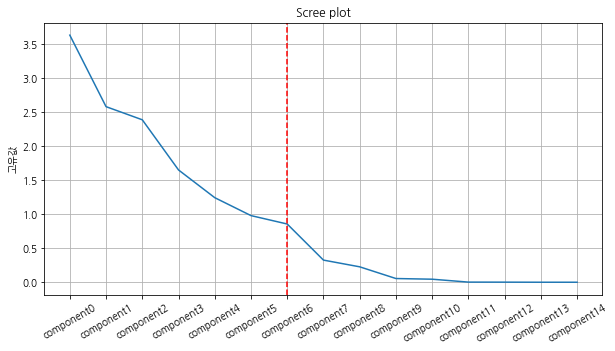

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(features))
pca.fit(grouped_within_iqr_stand)

e_value = pd.DataFrame({'고유값': pca.explained_variance_, '기여율': pca.explained_variance_ratio_}, index=[f"component{i}" for i in range(len(features))])
e_value['누적기여율'] = e_value['기여율'].cumsum()
print("고유값 요약 : ", e_value, sep='\n')
    
fig, ax = plt.subplots(1,1, figsize = (10, 5))
sns.lineplot(x=e_value.index, y='고유값', markers='o', data=e_value, ax=ax)
ax.grid()
ax.set_title('Scree plot')

for i, v in enumerate(e_value['누적기여율']):
    if v > 0.9:
        ax.axvline(e_value.index[i], ls='--', color='red')
        best_dim = i+1
        break

print('best_dim', best_dim)
plt.xticks(rotation=30)
plt.show()

### 3-1 2번에서 진행한 재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

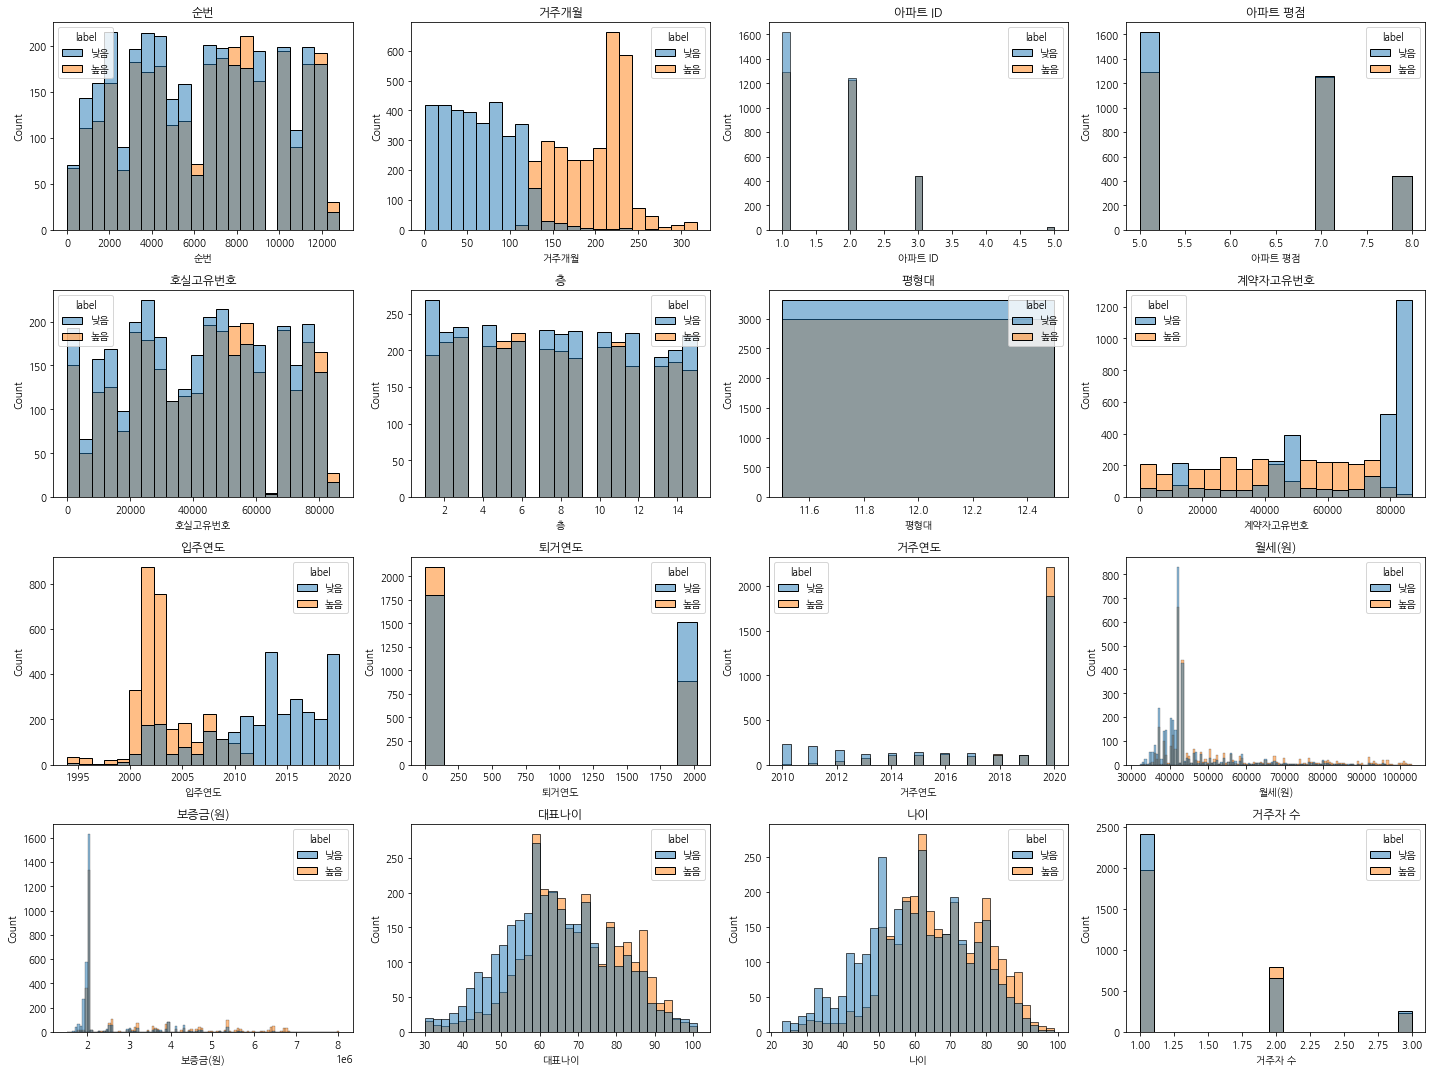

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

features = grouped_within_iqr.columns.to_list()
target = 'label'
features.remove(target)

r, c = ceil(len(features)/4), 4
fig, axes = plt.subplots(r, c, figsize=(20, 15))

for i, column in enumerate(features):
    ax_r, ax_c = int(i//c), int(i%c)
    sns.histplot(grouped_within_iqr, x=column, hue=target, ax = axes[ax_r][ax_c])
    axes[ax_r][ax_c].set_title(column)
    
plt.tight_layout()
plt.show()

### 3-2. 재계약횟수 변수를 종속변수로 하는 회귀 분석 모델을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오. 재계약횟수 이분변수를 종속변수로 하는 분류 분석을 두가지 이상의 방법론을 통해 수행하고 최종 모델을 결정한 후 그 이유를 작성하시오 

재계약 횟수를 기준으로 다음과 같은 특징을 살펴볼 수 있다.
- 재계약 횟수가 높은 변수는 입주연도가 오래되고, 거주 개월이 높은 변수들이다. 이는 재계약을 자주 했다면 오래 머물렀을 것이므로 당연한 결과라고 볼 수 있다. 
- 오래 머물렀기 때문에 대표나이 및 나이가 대부분 높은 것을 확인할 수 있다.
- 또한, 계약자 고유번호도 대체로 낮은 값에 분포하고 있는데 이는 시계열적인 특징을 가지고 있다는 것을 확인할 수 있다.
- 아파트 평점이 낮은 사람의 수는 재계약횟수가 낮은 사람들이 재계약횟수가 높은 사람들보다 더 많은데 이는 만족도가 떨어지기 때문에 재계약을 하지 않는 것으로 보인다.
- 월세와 보증금의 값이 낮은 사람들은 대부분 재계약 횟수가 낮은 사람들이 많고, 반대로 재계약횟수가 높은 사람들은 보증금 및 월세가 높은 편에 분포하고 있다. 이는 월세와 보증금이 낮은 호실의 경우 상대적으로 퀄리티가 낮은 것으로 추측되며, 이는 아파트 평점이 설명하는 특징과 일치하는 부분이다.
- 거주자 수는 1인 가구가 재계약횟수가 낮은 사람들이 많았으며, 이는 나이와도 연결이 되는 부분이다.
- 아파트 ID가 1인 아파트는 만족도가 떨어지는 아파트에 속하며, 그 외에의 아파트는 비슷하다.

In [13]:
best_dim = 7

pca = PCA(n_components=best_dim)
pca.fit(grouped_within_iqr_stand)
pca_df = pd.DataFrame(data=pca.fit_transform(grouped_within_iqr_stand), columns=[f'pca{i}' for i in range(best_dim)])
pca_df['label'] = grouped_within_iqr['label'].values
pca_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,label
0,3.393393,3.220321,3.309497,-0.542168,1.367498,0.745559,-0.268289,낮음
1,3.385922,-0.697434,-2.679542,1.150578,-0.624951,0.809069,-0.283257,높음
2,3.311122,-0.384660,-0.771665,-0.394703,-1.418294,0.224060,-0.727753,높음
3,3.419401,1.205323,-0.543258,-1.408865,-0.714658,0.166845,-1.053395,높음
4,3.617938,2.575804,-1.644611,-1.568225,1.470132,0.071950,-0.859206,높음
...,...,...,...,...,...,...,...,...
6299,-1.788107,-2.110414,0.622680,-1.124956,1.039475,-0.496091,0.008024,낮음
6300,-2.914177,-1.975891,2.028115,-2.299469,0.219397,-1.319371,-0.223933,낮음
6301,-1.947539,-2.050886,0.857298,-1.369923,0.920832,-0.900270,0.001899,낮음
6302,-1.666442,-1.165210,-1.273185,-0.273160,2.882626,0.658781,0.208691,낮음


==================== sampling : grouped_within_iqr ====================
==================== model : logistic_regression ====================


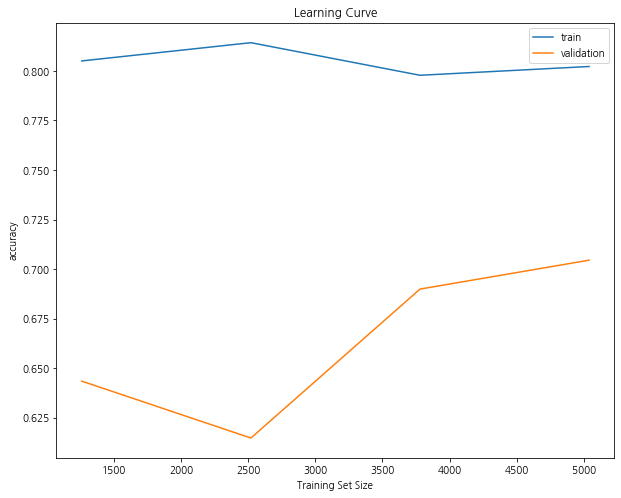


              precision    recall  f1-score   support

           0       0.78      0.76      0.77       331
           1       0.74      0.77      0.76       300

    accuracy                           0.76       631
   macro avg       0.76      0.76      0.76       631
weighted avg       0.76      0.76      0.76       631

inference speed: 0.0011301040649414062

==================== sampling : grouped_within_iqr ====================
==================== model : xgboost ====================


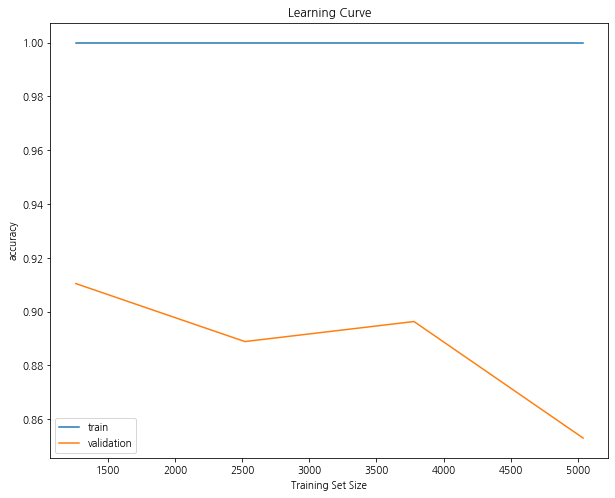


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       331
           1       0.97      1.00      0.98       300

    accuracy                           0.98       631
   macro avg       0.98      0.98      0.98       631
weighted avg       0.98      0.98      0.98       631

inference speed: 0.0026769638061523438

==================== sampling : pca_df ====================
==================== model : logistic_regression ====================


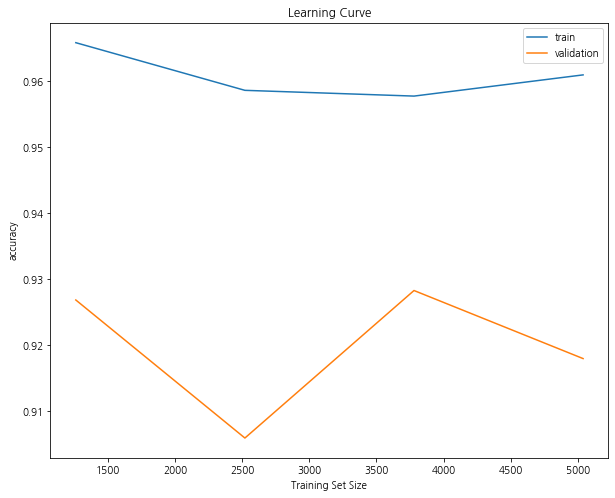


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       331
           1       0.95      0.96      0.96       300

    accuracy                           0.96       631
   macro avg       0.96      0.96      0.96       631
weighted avg       0.96      0.96      0.96       631

inference speed: 0.0008721351623535156

==================== sampling : pca_df ====================
==================== model : xgboost ====================


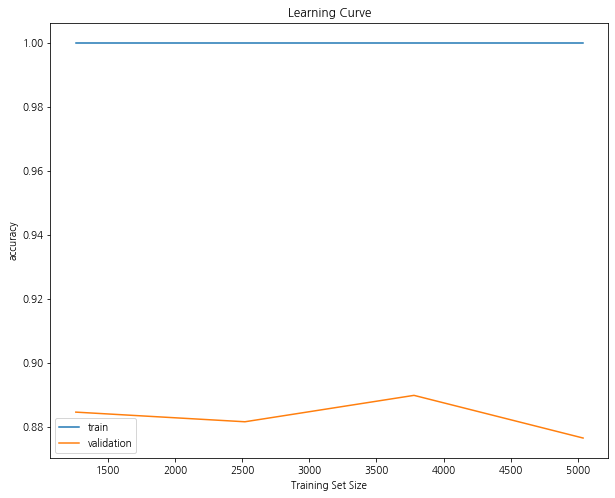


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       331
           1       0.95      0.94      0.95       300

    accuracy                           0.95       631
   macro avg       0.95      0.95      0.95       631
weighted avg       0.95      0.95      0.95       631

inference speed: 0.002466917037963867



In [14]:
import warnings
from time import time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

xgboost = XGBClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)
convert_label = {'높음':1, '낮음':0}
target= 'label'

for df_name in ['grouped_within_iqr', 'pca_df']:
    for model_name in ['logistic_regression', 'xgboost']:
        print('='*20,'sampling :', df_name, '='*20)
        print('='*20 , 'model :', model_name, '='*20)
        df = globals()[df_name]
        model = globals()[model_name]
        
        features = df.columns.to_list()
        if target in features:
            features.remove(target)
        if '높음' in df[target].to_list():
            df[target] = df[target].apply(lambda x: convert_label[x])

        metric = 'accuracy'
        train_sizes, train_scores, test_scores = learning_curve(
            estimator=model,
            X=df[features],
            y=df[target],
            cv=5,
            scoring=metric,
            train_sizes = [1, len(df) // 5, len(df) // 5 * 2, len(df) // 5 * 3,  len(df) // 5 * 4]
        )

        plt.subplots(figsize=(10,8))
        plt.plot(train_sizes, train_scores.mean(axis=1), label="train")
        plt.plot(train_sizes, test_scores.mean(axis=1), label="validation")

        plt.title("Learning Curve")
        plt.xlabel("Training Set Size")
        plt.ylabel(metric)
        plt.legend(loc="best")

        plt.show()
        
        x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.1, random_state=42)
        model.fit(x_train, y_train)
        
        start = time()
        y_pred = model.predict(x_test)
        end = time()

        # 정확도 평가
        cr = classification_report(y_test, y_pred)
        print()
        print(cr)
        print('inference speed:', end - start)
        print()

### 3-3 최종 채택한 모델에서 각각 변수 중요도를 확인하고 각 변수의 차이점을 설명하시오

==================== sampling : grouped_within_iqr ====================
==================== model : xgboost ====================


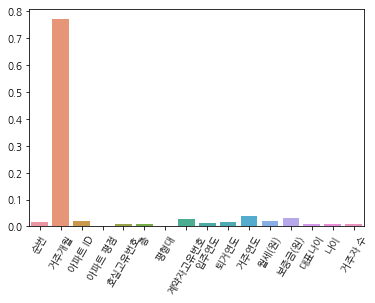

In [15]:
xgboost = XGBClassifier(random_state=42)
convert_label = {'높음':1, '낮음':0}
target= 'label'

for df_name in ['grouped_within_iqr']:
    for model_name in ['xgboost']:
        print('='*20,'sampling :', df_name, '='*20)
        print('='*20 , 'model :', model_name, '='*20)
        df = globals()[df_name]
        model = globals()[model_name]
        
        features = df.columns.to_list()
        if target in features:
            features.remove(target)
        if '높음' in df[target]:
            df[target] = df[target].apply(lambda x: convert_label[x])
        
        x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.1, random_state=42)
        model.fit(x_train, y_train)
        
        y_pred = model.predict(x_test)


sns.barplot(x=features, y=model.feature_importances_)
plt.xticks(rotation=60)
plt.show()

정량적으로 결과를 봤을때, 거주개월이 가장 높은 상관관계를 보이고, 거주연도 및 보증금이 중요한 변수임을 확인할 수 있다.

정성적으로 봤을 때, 이는 재계약을 하게 되면 자연스럽게 거주개월이 증가하게 되므로 강한 양의 상관관계를 보이게 되어 중요 변수의 역할을 한 것으로 보이며, 나머지 변수들 또한 거주를 얼마나 오래 하고 그에 따라 재계약을 하게 되는지에 대한 상관관계가 있는 변수로 보인다.

### 3-4 해당 데이터 분석결과로 얻을 수 있는 점 제시

이를 통해 변수 중요도가 높은 변수가 있을 경우 pca를 통해 차원 축소를 하더라도 그 특징을 잘 가지고 있으며, 이를 통해 pca를 통하여 logstic regression을 진행하면 정확도 및 속도 측면 모두를 가져갈 수 있다.### 3-4 해당 데이터 분석결과로 얻을 수 있는 점 제시

In [16]:
font_set.delete_font()

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018 데이터를 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv
- 데이터 설명 : 

A 야구구단의 시합 결과중 일부를 나타낸다.    
각 행은 하나의 경기를 의미(game_id)하며 9회차(= 9이닝) 동안 1번타자, 2번타자의 출루 정보를 의미한다.     
각 컬럼에 대한 설명은 아래 이미지와 같으며, value값의 index는 이미지의 '수치 의미' 열을 통해 확인 할 수 있다.


<img src="https://github.com/Datamanim/datarepo/blob/main/adp/29/p1_img.png?raw=true" width="500" height="600">

In [23]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url2 = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv'
encoded_url2 = urllib.parse.quote(url2, safe=':/')

response = urllib.request.urlopen(encoded_url2, context=context)
df2 = pd.read_csv(response, encoding='utf-8')
df2

,game_id,a1_1,a1_2,a2_1,a2_2,a3_1,a3_2,a4_1,a4_2,a5_1,...,a9_2,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,201900016,5,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,0,0,4,2
1,201900023,6,4,5,5,2,5,1,1,6,...,7,3,0,0,1,0,1,3,1,0
2,201900103,5,6,5,5,1,9,5,4,6,...,6,0,0,1,1,4,1,2,0,1
3,201900112,5,7,6,1,5,5,1,5,1,...,5,0,3,0,0,0,0,1,0,0
4,201900131,5,1,2,5,2,5,7,2,6,...,6,0,2,4,1,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,201902346,7,5,7,4,1,9,5,7,7,...,1,0,1,2,0,0,0,0,0,1
196,201902365,2,5,1,1,7,5,5,7,5,...,9,0,0,0,0,1,0,0,0,2
197,201902373,,7,5,6,5,9,7,5,1,...,5,0,0,0,0,0,1,0,0,0
198,201902392,6,5,5,1,1,5,6,5,5,...,7,0,0,2,1,0,0,0,2,1


### 4-1 각 회차별로 1번 타자의 출루 (1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다. 이를 위한 전처리를 수행하라. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외한다.)     

조건1 : 득점여부를 범주형 종속변수로 한다. (1점이상 득점 :1, 무득점 :0)     
조건2 : 각 회차 2번 타자의 데이터는 원핫 인코딩한다.    
조건3 : 학습에 적절하지 않은 데이터는 제외한다.    

In [24]:
# data = []
# for _, rows in df2.iterrows():
#     for i in range(1, 10):
#         first = rows[f'a{i}_1']
#         if first in [1, 2, 3, 6]:
#             second = rows[f'a{i}_2']
#             score = 1 if rows[f'b{i}'] > 0 else 0
#             data.append({'first':first, 'second':second, 'is_score':score})
# baseball_df = pd.DataFrame(data)
# baseball_df

##### 추후에 푼 풀이 #####
def one_hot(label):
    one_hot_list = [0] * 8
    if label > 4:
        one_hot_list[label - 2] = 1
    elif label < 4:
        one_hot_list[label - 1] = 1
    else:
        return False
    
    return one_hot_list


data = []
second_columns = list(range(1, 10))
second_columns.remove(4)
for _, rows in df2.iterrows():
    for i in range(1, 10):
        first = rows[f'a{i}_1']
        if first in [1, 2, 3, 6]:
            second = rows[f'a{i}_2']
            one_hot_list = one_hot(second)
            
            if not one_hot_list:
                continue
            
            seconds = {c:value for c, value in zip(second_columns, one_hot_list)}
            
            score = 1 if rows[f'b{i}'] > 0 else 0
            
            data.append({'first':first, **seconds, 'is_score':score})
            
baseball_df = pd.DataFrame(data)
baseball_df

,first,1,2,3,5,6,7,8,9,is_score
0,1,1,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0
3,6,0,0,0,1,0,0,0,0,0
4,2,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
288,1,0,0,0,1,0,0,0,0,1
289,1,0,0,0,1,0,0,0,0,0
290,1,0,0,0,1,0,0,0,0,1
291,6,0,0,0,0,0,1,0,0,0


### 4-2 4-1 데이터에 대해 Logistic Regression을 적용하고 2번타자의 희생번트 여부에 대한 회귀 계수 검정을 하라

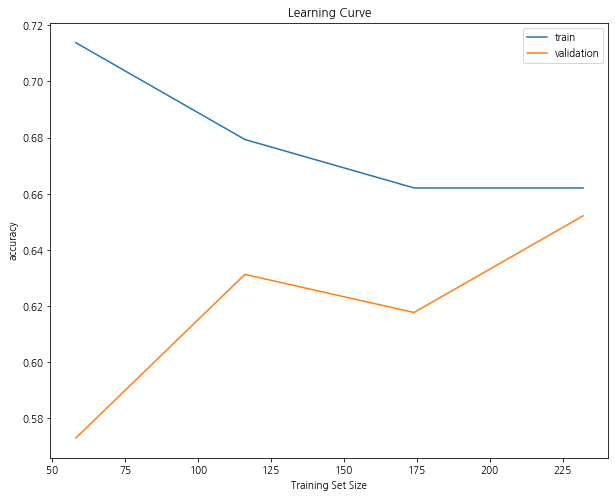


              precision    recall  f1-score   support

           0       0.56      0.71      0.63        14
           1       0.67      0.50      0.57        16

    accuracy                           0.60        30
   macro avg       0.61      0.61      0.60        30
weighted avg       0.61      0.60      0.60        30

inference speed: 0.0009799003601074219



In [25]:
import warnings
from time import time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

model = LogisticRegression(random_state=42)
target= 'is_score'

        
features = baseball_df.columns.to_list()
if target in features:
    features.remove(target)

metric = 'accuracy'
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=baseball_df[features],
    y=baseball_df[target],
    cv=5,
    scoring=metric,
    train_sizes = [1, len(baseball_df) // 5, len(baseball_df) // 5 * 2, len(baseball_df) // 5 * 3,  len(baseball_df) // 5 * 4]
)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_scores.mean(axis=1), label="train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel(metric)
plt.legend(loc="best")

plt.show()

x_train, x_test, y_train, y_test = train_test_split(baseball_df[features], baseball_df[target], test_size=0.1, random_state=42)
model.fit(x_train, y_train)

start = time()
y_pred = model.predict(x_test)
end = time()

# 정확도 평가
cr = classification_report(y_test, y_pred)
print()
print(cr)
print('inference speed:', end - start)
print()

In [26]:
import statsmodels.api as sm
# 더미 변수 설정??

data = []
for _, rows in df2.iterrows():
    for i in range(1, 10):
        first = rows[f'a{i}_1']
        if first in [1, 2, 3, 6]:
            if rows[f'a{i}_2'] != 4:
                second = 1 if rows[f'a{i}_2'] == 9 else 0
                score = 1 if rows[f'b{i}'] > 0 else 0
                data.append({'first':first, 'second':second, 'is_score':score})
baseball_df2 = pd.DataFrame(data)

features2 = baseball_df2.columns.to_list()
features2.remove(target)

X = baseball_df2[features2]
X = sm.add_constant(X)
y = baseball_df2[target]

model = sm.Logit(y, X).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.676331
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_score   No. Observations:                  293
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                0.008806
Time:                        15:57:39   Log-Likelihood:                -198.16
converged:                       True   LL-Null:                       -199.93
Covariance Type:            nonrobust   LLR p-value:                    0.1720
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2839      0.206      1.380      0.168      -0.119       0.687
first         -0.0318      0.056     -0.563      0.574      -0.142       0.079
second         0.5297      0.317      1.670      0.095      -0.092       1.151
==============================================================================
"""

### 4-3 SMOTE (random_state =0 지정)를 적용하여 data imbalance를 해결하라

<AxesSubplot:xlabel='is_score', ylabel='count'>

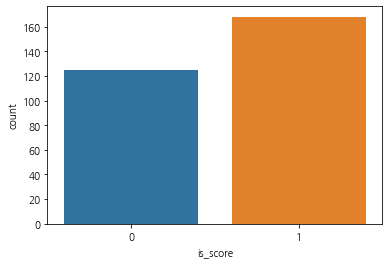

In [27]:
sns.countplot(data=baseball_df, x='is_score')

<AxesSubplot:>

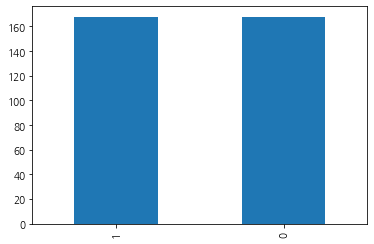

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0, k_neighbors=3)

bal_features, bal_target = smote.fit_resample(baseball_df[features], baseball_df[target])
bal_target.value_counts().plot(kind='bar')

### 4-4 4-3에서 변환한 데이터를 기준으로 Logistic Regression을 적용하고 결과를 분석하라

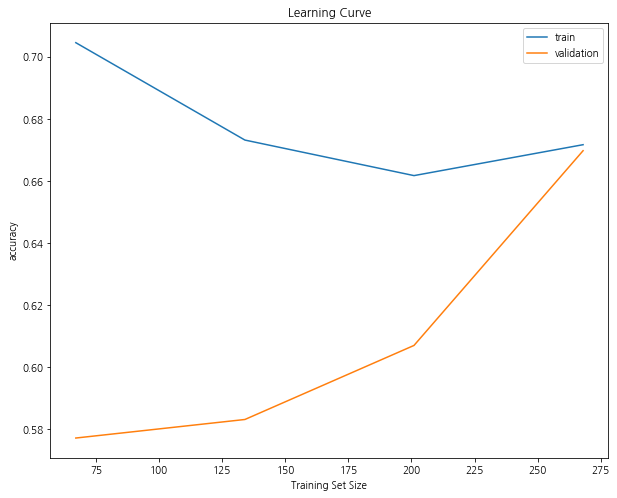


              precision    recall  f1-score   support

           0       0.47      0.67      0.55        12
           1       0.76      0.59      0.67        22

    accuracy                           0.62        34
   macro avg       0.62      0.63      0.61        34
weighted avg       0.66      0.62      0.63        34

inference speed: 0.0009069442749023438



In [29]:
model = LogisticRegression(random_state=42)
target= 'is_score'

features = baseball_df.columns.to_list()
if target in features:
    features.remove(target)

metric = 'accuracy'
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=bal_features,
    y=bal_target,
    cv=5,
    scoring=metric,
    train_sizes = [1, len(bal_target) // 5, len(bal_target) // 5 * 2, len(bal_target) // 5 * 3,  len(bal_target) // 5 * 4]
)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_scores.mean(axis=1), label="train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel(metric)
plt.legend(loc="best")

plt.show()

x_train, x_test, y_train, y_test = train_test_split(bal_features, bal_target, test_size=0.1, random_state=42)
model.fit(x_train, y_train)

start = time()
y_pred = model.predict(x_test)
end = time()

# 정확도 평가
cr = classification_report(y_test, y_pred)
print()
print(cr)
print('inference speed:', end - start)
print()

### 4-5 4-3에서 변환한 데이터를 기준으로 XGBoost 적용하고 결과를 분석하라

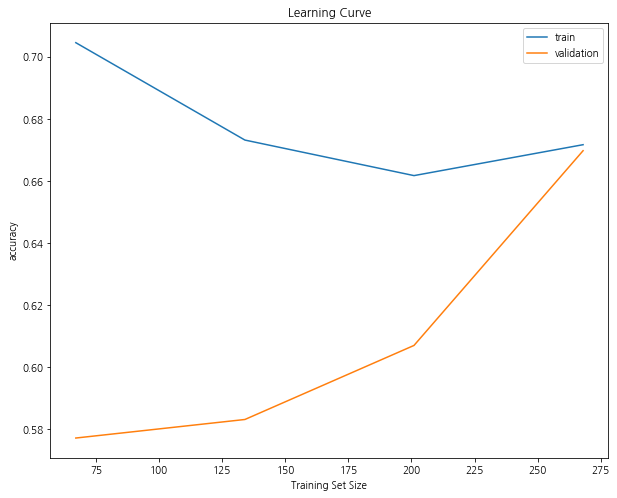


              precision    recall  f1-score   support

           0       0.47      0.67      0.55        12
           1       0.76      0.59      0.67        22

    accuracy                           0.62        34
   macro avg       0.62      0.63      0.61        34
weighted avg       0.66      0.62      0.63        34

inference speed: 0.0009510517120361328



In [30]:
xgboost = XGBClassifier(random_state=42)
target= 'is_score'

features = baseball_df.columns.to_list()
if target in features:
    features.remove(target)

metric = 'accuracy'
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=bal_features,
    y=bal_target,
    cv=5,
    scoring=metric,
    train_sizes = [1, len(bal_target) // 5, len(bal_target) // 5 * 2, len(bal_target) // 5 * 3,  len(bal_target) // 5 * 4]
)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_scores.mean(axis=1), label="train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel(metric)
plt.legend(loc="best")

plt.show()

x_train, x_test, y_train, y_test = train_test_split(bal_features, bal_target, test_size=0.1, random_state=42)
model.fit(x_train, y_train)

start = time()
y_pred = model.predict(x_test)
end = time()

# 정확도 평가
cr = classification_report(y_test, y_pred)
print()
print(cr)
print('inference speed:', end - start)
print()

# 통계 (40점)

### 5. TV 패널을 생산하는 공장에서 제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오. (소수점 다섯 째 자리에서 반올림)

In [31]:
print(round(0.97**22 * 0.03**3 * 100, 5), '%')

0.00138 %


### 6. A, B 두 공장에서 생산되는 제품 중에서 양품일 확률은 15,000개 중에서 11,800개가 양품, 21,000개 중에서 16,400개가 양품이다. 두 공장의 양품 확률이 같은지를 검정하라

#### 6-1 연구가설과 귀무가설을 세워라

- H0 : 두 공장의 양품 확률은 동일하다.
- H1 : 두 공장의 양품 확률은 다르다.#### 6-1 연구가설과 귀무가설을 세워라

#### 6-2 검정 통계량을 구하고 10% 유의수준에서 검정하여라

In [32]:
import numpy as np
from scipy.stats import norm

n1 = 15_000
p1 = 11_800 / n1
n2 = 21_000
p2 = 16_400 / n2

conf_a = 0.1

d0 = 0
d = p1 - p2
pe = (n1 * p1 + n2 * p2) / (n1 + n2)
se2 = np.sqrt(pe * (1 - pe) * (1 / n1 + 1 / n2))
zstat = d / se2

conf_z = norm.ppf(1 - conf_a / 2)

sp = (1 - norm.cdf(np.abs(zstat))) * 2

print('검정 통계량 :', zstat)
print('유의 확률 :', sp)
if sp < 0.1:
    print('귀무가설 기각, 연구가설 채택, 두 공장의 양품 확률은 동일하지 않다.')
else:
    print('귀무가설 채택, 두 공장의 양품 확률은 동일하다.')

검정 통계량 : 1.2974679032710905
유의 확률 : 0.1944702418645563
귀무가설 채택, 두 공장의 양품 확률은 동일하다.


In [ ]:
# sol3 카이제곱 독립성 검성
observed = [[600, 400], [200, 300]]
chi2, p_value, dof, expected = chi2_contingency(observe

[11800,3200], [16400,4600]                                                
                                                
6. C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률
에 차이가 있는지 검정하여라                                                
  
                                                
15,000개 중에서 11,800개가 양품, 21,000개 중에서 16,400개가 양품이다. 두 공장의 양품 확률이 같은지를 검정하라                                                

In [2]:
21000-16400

4600

In [16]:
import numpy as np
x1 = 11_800
n1 = 15_000
p1 = x1 / n1

x2 = 16_400
n2 = 21_000
p2 = x2 / n2

conf_a = 0.1

d0 = 0
d = p1 - p2
pe = (n1 * p1 + n2 * p2) / (n1 + n2)
se2 = np.sqrt(pe * (1 - pe) * (1 / n1 + 1 / n2))
zstat = d / se2

zstat

1.2974679032710905

In [8]:
p_hat = (x1+x2)/(n1+n2)
p_hat

0.7833333333333333

In [10]:
p_hat = (x1+x2)/(n1+n2)
z = (p1-p2)/(np.sqrt(p_hat*(1-p_hat)*(1/n1+1/n2)))

p_hat, z

(0.7833333333333333, 1.2974679032710905)

In [14]:
conf_z = norm.ppf(1 - conf_a / 2)

sp = (1 - norm.cdf(np.abs(z))) * 2
sp

0.1944702418645563

In [15]:
z

1.2974679032710905

In [12]:
import numpy as np
from scipy.stats import norm


import scipy.stats as stats
import math

(1-pnorm(z))*2

NameError: name 'pnorm' is not defined

## 7. 아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도 이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

dataurl : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv

In [33]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url3 = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv'
encoded_url3 = urllib.parse.quote(url3, safe=':/')

response3 = urllib.request.urlopen(encoded_url3, context=context)
df3 = pd.read_csv(response3, encoding='utf-8')
df3

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693
5,B,14.297589
6,B,19.737638
7,B,17.302304
8,B,13.591577
9,B,16.627680


### 7-1. 각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.

#### 7-1 연구가설과 귀무가설을 세워라

- H0 : 각 차종별 범퍼 파손의 정도가 차이가 없다.
- H1 : 각 차종별 범퍼 파손의 정도가 차이가 존재한다.#### 7-1 연구가설과 귀무가설을 세워라

#### 7-2 검정 통계량을 구하여라

In [34]:
# 등분산성 및 정규분포 만족, one-way ANOVA 시행
from statsmodels.stats.oneway import anova_oneway

df3.melt()
oa = anova_oneway(
    data=df3['ratio'],
    groups=df3['name'],
    use_var='equal'
)

print('검정 통계량 :', oa.statistic)

검정 통계량 : 24.976953075185296


#### 7-3 귀무가설을 기각하는가? 그리고 그 이유를 설명하여라. 만약 귀무가설을 기각하지 못한다면 다중비교(사후비교)를 시행하여라

In [35]:
conf_a = 0.05

if oa.pvalue < conf_a:
    print(oa.pvalue)
    print('귀무가설 기각, 연구가설 채택, 각 차종별 범퍼 파손의 정도가 차이가 존재한다.')
else:
    print('귀무가설 채택, 각 차종별 범퍼 파손의 정도가 차이가 존재하지 않는다.')

2.8174779556216314e-06
귀무가설 기각, 연구가설 채택, 각 차종별 범퍼 파손의 정도가 차이가 존재한다.


### 8. L1,L2,L3 세 개의 생산라인에서 각각 13%, 37%, 50%를 생산하며 각각 2.1% , 1.1%, 3.3% 불량률을 갖는다. 불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률을 구하시오. (소수점 둘째자리에서 반올림)

In [36]:
print(round(0.13 * 0.021 / (0.13 * 0.021 + 0.37 * 0.011 + 0.5 * 0.033) * 100, 2), '%')

11.72 %
